In [20]:

import json
import jsonlines

# Das (natural language toolkit) müsst ihr bestimmt installieren.
# Weiß noch jemand, wie das geht?
import nltk

# Die collections.Counter package müsst ihr bestimmt auch installieren.
# Die brauchen wir später, um Worte zu zählen.
from collections import Counter



# Hier legen wir fest, welche Daten (Wahlperiode 19 oder 20) wir laden:
legislatur = 19

# Wir generieren eine leere Liste:
alleReden19 = []

# Wir öffnen den entsprechende File (Dateipfad anpassen!):
with jsonlines.open(f'../../data/speeches_{legislatur}.jsonl') as f:
    for line in f.iter():
    # Wir packen alles Zeile für Zeile zu unserer Liste:
        alleReden19.append(line)
        
# Wir sortieren nach Datum:
alleReden19.sort(key = lambda x:x['date'])

# Wir lassen uns zeigen, wie viele Reden enthalten sind.
print(f'Die Liste enthält {len(alleReden19)} Reden')
# Neue Zeile auf der Konsole:
print(f'\n')


# Hier legen wir fest, welche Daten (Wahlperiode 19 oder 20) wir laden:
legislatur = 20

# Wir generieren eine leere Liste:
alleReden20 = []

# Wir öffnen den entsprechende File (Dateipfad anpassen!):
with jsonlines.open(f'../../data/speeches_{legislatur}.jsonl') as f:
    for line in f.iter():
    # Wir packen alles Zeile für Zeile zu unserer Liste:
        alleReden20.append(line)
        
# Wir sortieren nach Datum:
alleReden20.sort(key = lambda x:x['date'])

# Wir lassen uns zeigen, wie viele Reden enthalten sind.
print(f'Die Liste enthält {len(alleReden20)} Reden')
# Neue Zeile auf der Konsole:
print(f'\n')


Die Liste enthält 25187 Reden


Die Liste enthält 10791 Reden




In [21]:
## Zunächst brauchen wir eine Funktion, die uns die Reden gibt, die ein bestimmtes Wort enthalten. 
#  Funktion für Textsuche: 
#  Gibt eine Untermenge an Reden zurück, die einen bestimmten String (Wort) enthalten.

def find_speeches_with_word(search_term, speeches):
    filtered_speeches = []
    for speech in speeches:
        if ( search_term in speech['text'] ):
            filtered_speeches.append(speech)
    return filtered_speeches


## Reden sind lang und die Worte tauchen in verschiedenen Kontexten auf.
#  Wir würden gerne alle Sätze sehen, in denen der Suchbegriff vorkommt.
#  Aber natürlich kommt unser Suchstring nur in Sätzen vor, die in de Untermenge an Reden sind. 

def find_sentences_with_word(search_term, speeches):
    sents_with_word = []
    for speech in speeches:
        sent_list = nltk.sent_tokenize(speech['text'])
        for sent in sent_list:
            if search_term in sent:
                sents_with_word.append(sent)
    return sents_with_word


## Nun wäre es doch spannend, die Reden einer Partei oder eines Politikers zu sehen.
#  Dazu entwickeln wir eine Funktion, die es erlaubt, in den anderen Felder (keys) zu suchen.
#  Funktion, mit der man eine Menge an Reden nach verschiedenen Kriterien filtern kann.
#  Es wird die entsprechende Untermenge zurückgegeben.
#  'what' enthält den Key, wo gesucht werden soll. Interessant vor allem: 'name' und 'party'

def filter_speeches_for(what, search_term, speeches):
    filtered_speeches = []
    for speech in speeches:
        if search_term in speech[what]:
            filtered_speeches.append(speech)
        
    filtered_speeches.sort(key = lambda x:x['date'])   
    return filtered_speeches

In [23]:
## Ich probiere etwas aus

## Ich muss aber wissen, wie die Parteien geschrieben werden!
#for speech in alleReden:
#    print(speech['party'])

such_wort1 = 'Klimawandel'
such_wort2 = 'Klimakrise'

#such_wort1 = 'Klima'
#such_wort2 = 'Energie'

#such_wort1 = 'Corona'
#such_wort2 = 'Sport'

alleReden = alleReden19

parties = ['SPD','FDP','CDU','LINKE','GRÜNEN','AfD','unknown'] # sind die richtig geschrieben?

untermengeSW1 = find_speeches_with_word(such_wort1,alleReden)
frequencies1 = []
for party in parties: 
    untermenge = filter_speeches_for('party', party, untermengeSW1)
    satz_liste = find_sentences_with_word(such_wort1, untermenge)
    print(f'Die {party} hat {len(untermenge)} Reden mit "{such_wort1}" gehalten.')
    print(f'Die {party} hat {len(satz_liste)} Sätze mit "{such_wort1}" gehalten.')
    #frequencies1.append(len(untermenge))
    frequencies1.append(len(satz_liste))

print('\n')
untermengeSW2 = find_speeches_with_word(such_wort2,alleReden)
frequencies2 = []
for party in parties:
    untermenge = filter_speeches_for('party', party, untermengeSW2)
    satz_liste = find_sentences_with_word(such_wort2, untermenge)
    print(f'Die {party} hat {len(untermenge)} Reden mit "{such_wort2}" gehalten.')
    print(f'Die {party} hat {len(satz_liste)} Sätze mit "{such_wort2}" gehalten.')
    #frequencies2.append(len(untermenge))
    frequencies2.append(len(satz_liste))
    
#print(frequencies1)

Die SPD hat 199 Reden mit "Klimawandel" gehalten.
Die SPD hat 308 Sätze mit "Klimawandel" gehalten.
Die FDP hat 59 Reden mit "Klimawandel" gehalten.
Die FDP hat 89 Sätze mit "Klimawandel" gehalten.
Die CDU hat 186 Reden mit "Klimawandel" gehalten.
Die CDU hat 335 Sätze mit "Klimawandel" gehalten.
Die LINKE hat 117 Reden mit "Klimawandel" gehalten.
Die LINKE hat 185 Sätze mit "Klimawandel" gehalten.
Die GRÜNEN hat 48 Reden mit "Klimawandel" gehalten.
Die GRÜNEN hat 57 Sätze mit "Klimawandel" gehalten.
Die AfD hat 84 Reden mit "Klimawandel" gehalten.
Die AfD hat 141 Sätze mit "Klimawandel" gehalten.
Die unknown hat 62 Reden mit "Klimawandel" gehalten.
Die unknown hat 96 Sätze mit "Klimawandel" gehalten.


Die SPD hat 22 Reden mit "Klimakrise" gehalten.
Die SPD hat 29 Sätze mit "Klimakrise" gehalten.
Die FDP hat 2 Reden mit "Klimakrise" gehalten.
Die FDP hat 2 Sätze mit "Klimakrise" gehalten.
Die CDU hat 13 Reden mit "Klimakrise" gehalten.
Die CDU hat 15 Sätze mit "Klimakrise" gehalten.
D

# Ergebnisse

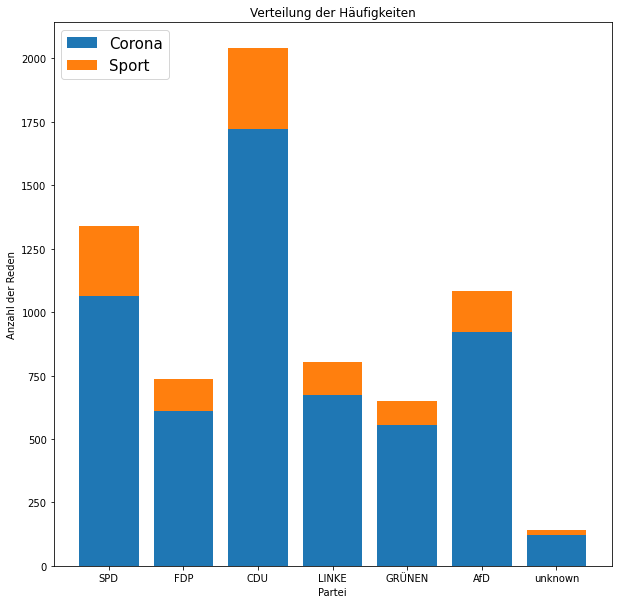

In [19]:

import matplotlib.pyplot as plt

#mpl.rcParams["figure.figsize"] = (8,8)
fig = plt.figure(figsize=(10,10))     
    
plt.bar(parties,frequencies1,label=f'{such_wort1}')
plt.bar(parties,frequencies2,bottom=frequencies1,label=f'{such_wort2}')
plt.title("Verteilung der Häufigkeiten")
plt.xlabel("Partei")
plt.ylabel("Anzahl der Reden")
plt.legend(loc="upper left",prop={'size': 15})


#plt.hist(freq_array, bins ='auto')
plt.show()

#plt.savefig('sample.svg')